In [1]:
import networkx as nx
import pandas as pd

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

In [2]:
pwd

'D:\\Users\\andre.ferreira\\Documents\\sandbox'

### Data-set Answers from Stackoverflow community 

http://snap.stanford.edu/data/sx-stackoverflow.html

In [3]:
pdtxt = pd.read_csv('sx-stackoverflow-a2q-raw.txt', delimiter=' ', header=None, names=['nodeA', 'nodeB', 'time'])

### dont want time graph network, drop 'time'

In [4]:
pdtxt.drop(columns=['time'], inplace=True) # dont want time graph network

In [5]:
pdtxt.head()

,nodeA,nodeB
0,9,8
1,1,1
2,13,1
3,17,1
4,48,2


### Sort by ascending, so sorting by first users of stackoverflow

In [6]:
pdtxt.sort_values(by='nodeA', inplace=True)

#### Only answers of the following users will be in the graph

In [7]:
firstusers = pdtxt[:2000].nodeA.unique()
firstusers

array([ 1,  2,  3,  4,  5,  9, 13], dtype=int64)

In [8]:
pdtxt.head()

,nodeA,nodeB
1070571,1,51
2776718,1,76393
15795,1,383
350029,1,80368
74632,1,1


In [9]:
len(pdtxt)

17823525

### save only first 2000 edges will correspond to first answers of first StackOverflow users

In [10]:
pdtxt[:2000].to_csv('sxstackoverflowa2q.txt', header=None, index=None) # first 2000 edges

In [11]:
nx.read_edgelist?

In [66]:
stackanswers = nx.read_edgelist('sxstackoverflowa2q.txt', delimiter=',', nodetype=int)

In [65]:
nx.read_edgelist?

In [39]:
!head sx-stackoverflow-a2q.txt

'head' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [69]:
stackanswers?

In [70]:
nx.draw_networkx?

#### Some different graph layouts

In [94]:
pos = nx.drawing.layout.kamada_kawai_layout(stackanswers)

In [67]:
pos = nx.drawing.layout.spring_layout(stackanswers)

In [77]:
nx.draw_networkx_labels?

In [78]:
nx.draw_networkx?

In [82]:
nx.draw_networkx_nodes?

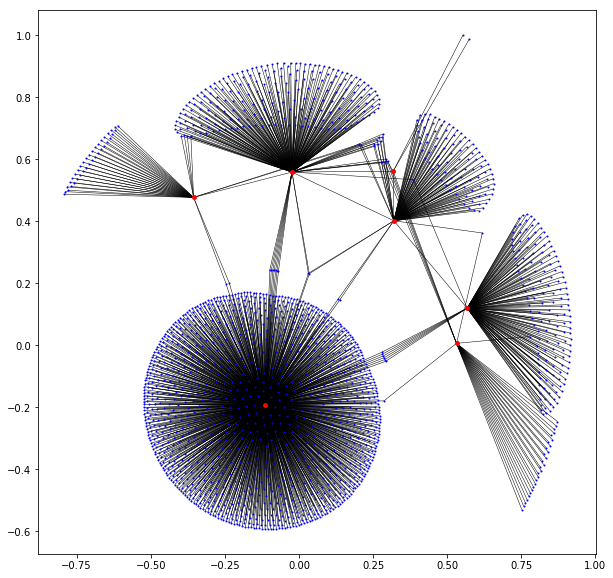

In [95]:
plt.figure(figsize=(10,10))

nx.draw_networkx(stackanswers, pos, node_color='blue', node_size=1.0, 
                 with_labels=False, width=0.5, edge_cmap=plt.cm.Blues, arrowsize=10)

nx.draw_networkx_nodes(stackanswers, pos,
                       nodelist=[ 1,  2,  3,  4,  5,  9, 13],
                       node_color='red',
                       node_size=15.)

plt.savefig('stackoverflow_first2000edges.png', dpi=250)
plt.show()